# Tutorial CNN - Brais Gesto Herrera

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix


## Inputting an example dataset

In [3]:
# Load dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values (0–1) and reshape for CNN
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Class names for labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 12us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 64s 2us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 1s 172us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 10s 2us/step


## Visualizing some of the data

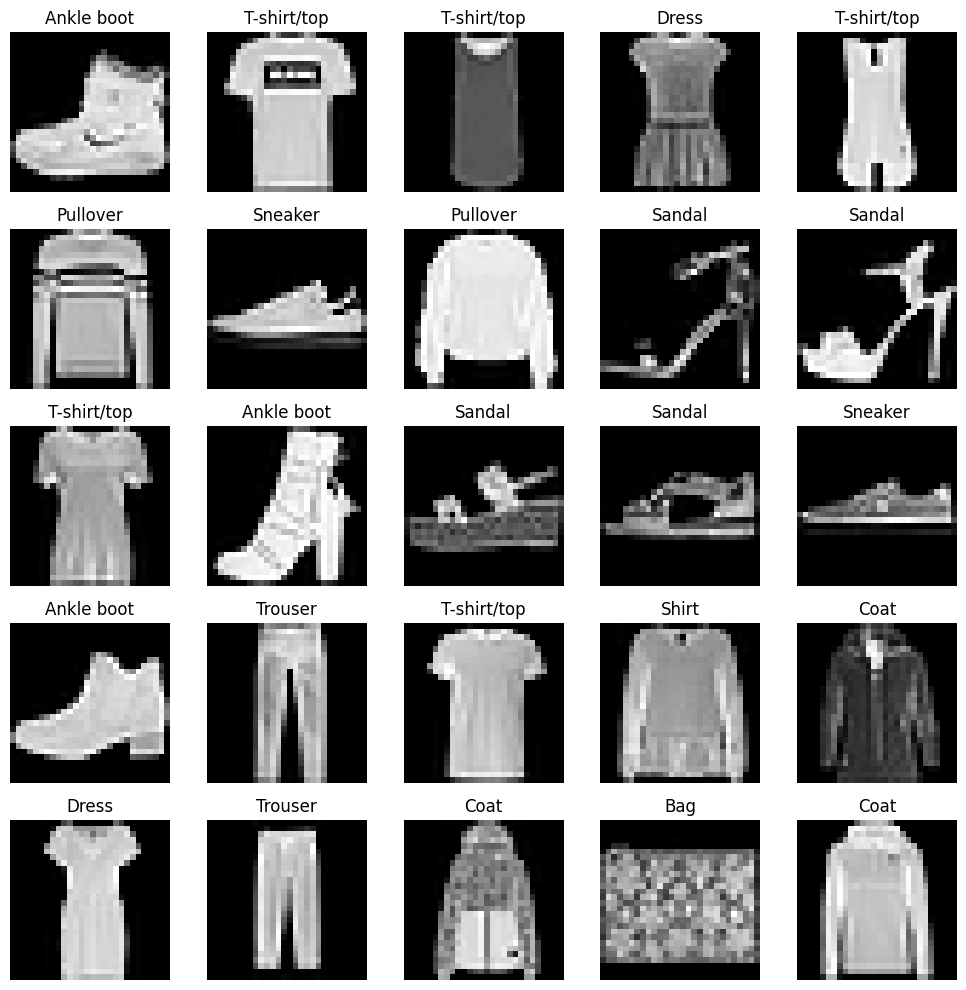

In [4]:
# Show 25 sample images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()


## Creating the model

In [6]:
from tensorflow.keras import Input

model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train_cat, epochs=5, batch_size=128,
                    validation_split=0.2)


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.6588 - loss: 0.9641 - val_accuracy: 0.8508 - val_loss: 0.4167
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.8366 - loss: 0.4525 - val_accuracy: 0.8733 - val_loss: 0.3492
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.8652 - loss: 0.3810 - val_accuracy: 0.8828 - val_loss: 0.3161
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.8730 - loss: 0.3498 - val_accuracy: 0.8863 - val_loss: 0.3063
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.8827 - loss: 0.3217 - val_accuracy: 0.8913 - val_loss: 0.2901


## Plotting results

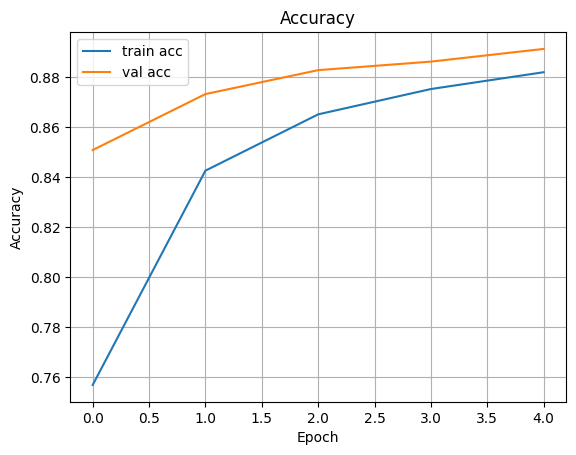

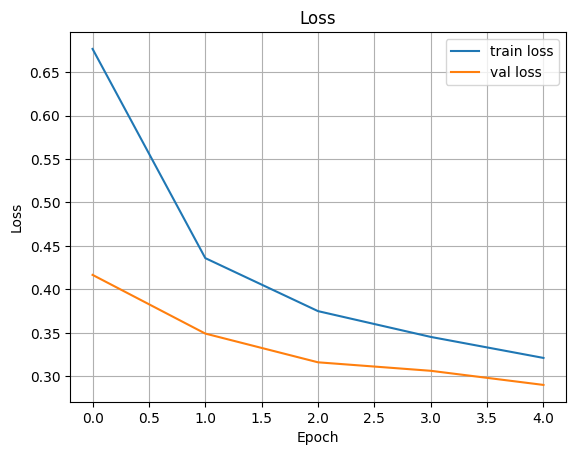

In [8]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8855 - loss: 0.3099
Test Accuracy: 0.8860


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


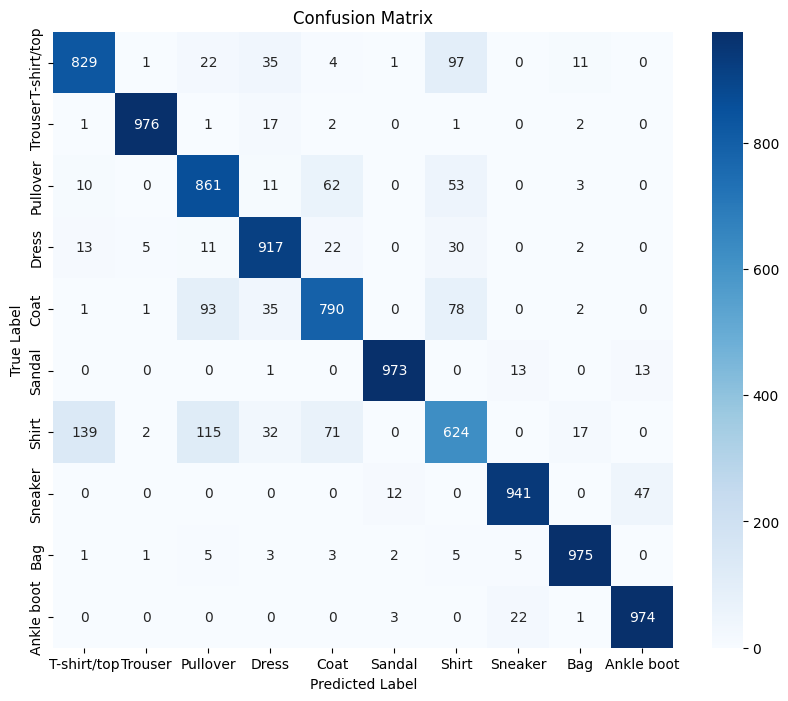

In [10]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()
